<a href="https://colab.research.google.com/github/Endy135/College_Managment_Project/blob/main/INPHB_NLP_Seminar_2024_Day_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1: Classification

In [ ]:
# !pip insatall pandas==1.5.3

In [ ]:
import os
import re
import random

import pandas as pd
import seaborn as sns
from glob import glob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Load and prepare dataset

In [ ]:
%%capture
def load_bbc_datasets(n_sample=1000):
    """Download datasets from http://mlg.ucd.ie/datasets/bbc.html
    and process them to a pandas dataframe.
    """
    if not os.path.exists(f"bbc_{n_sample}.csv"):
        !wget http://mlg.ucd.ie/files/datasets/bbc-fulltext.zip
        !unzip bbc-fulltext.zip
        !rm -rf bbc-fulltext.zip
        !rm ./bbc/README.TXT

        random.seed(120)
        paths = glob("/content/bbc/*")
        articleIds =[]
        texts = []
        categories = []

        for path in paths:
            sub_paths = glob(path + "*/*.txt")
            sub_paths.sort()
            for sub_path in random.sample(sub_paths, min(len(sub_paths), n_sample)):
                with open(sub_path, "r") as f:
                    articleIds.append(sub_path.split("/")[-1][:-4])
                    texts.append(f.read())
                    categories.append(path.split('/')[-1])

            df = pd.DataFrame({
                "ArticleId": articleIds,
                "Text": texts,
                "Category": categories
            })

        df = df.sample(frac=1, random_state=120).reset_index(drop=True)
        df.to_csv(f"bbc_{n_sample}.csv", index=False)
        !rm -rf bbc
    else:
        df = pd.read_csv(f"bbc_{n_sample}.csv")

    return df

df = load_bbc_datasets(n_sample=1000)


In [ ]:
# create category id
category = df['Category'].factorize()
df['category_id'] = category[0]

In [ ]:
df.head()

,ArticleId,Text,Category,category_id
0,308,Microsoft makes anti-piracy move\n\nMicrosoft ...,tech,0
1,328,Bookmakers back Aviator for Oscar\n\nThe Aviat...,entertainment,1
2,260,Labour seeks to quell feud talk\n\nLabour's le...,politics,2
3,088,Ocean's Twelve raids box office\n\nOcean's Twe...,entertainment,1
4,307,Wales critical of clumsy Grewcock\n\nWales coa...,sport,3


In [ ]:
i = 1
print(df.Category[i])
print(5*"-")
print(df.Text[i])

entertainment
-----
Bookmakers back Aviator for Oscar

The Aviator has been tipped by UK bookmakers as the favourite to win the best film award at this year's Oscars.

Ray star Jamie Foxx is clear favourite in the best actor category while Million Dollar Baby's Hilary Swank is tipped to win the best actress prize. Bookmakers predict Cate Blanchett will be named best supporting actress. William Hill and Ladbrokes have given The Aviator 4/9 and 8/13 odds of winning best film, with Million Dollar Baby in second place at 9/4.

Bet Direct and Bet 365 also tip The Aviator, with the majority of bookmakers regarding Finding Neverland as the outsider. The Aviator is also widely tipped to win the best director prize for Martin Scorsese. British star Clive Owen is second favourite at William Hill to take the best supporting actor award, for his performance in Closer. The favourite in that category is Sideways star Thomas Hayden Church. Vera Drake star Imelda Staunton has 5/1 odds of winning the b

- Q1: describe your dataset

In [ ]:
# code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ArticleId    2225 non-null   object
 1   Text         2225 non-null   object
 2   Category     2225 non-null   object
 3   category_id  2225 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 69.7+ KB


- Q: Any comment ?

> answer here




- Q2:
 plot label frequency

[resource](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)

<Axes: >

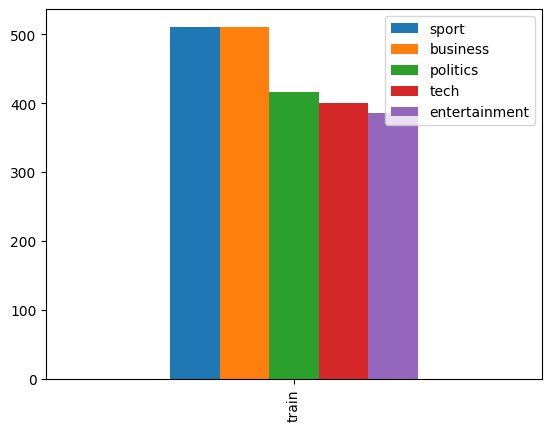

In [ ]:
pd.DataFrame([df.Category.value_counts()], index=["train"]).plot.bar()

- Q3: what about class balance

## Split to train and test data

[resource](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test =[], []

# code here
df_train, df_test = train_test_split(df, test_size = 0.2, stratify = df['Category'])



print("train shape:", df_train.shape)
print("test shape:", df_test.shape)

train shape: (1780, 4)
test shape: (445, 4)


<Axes: >

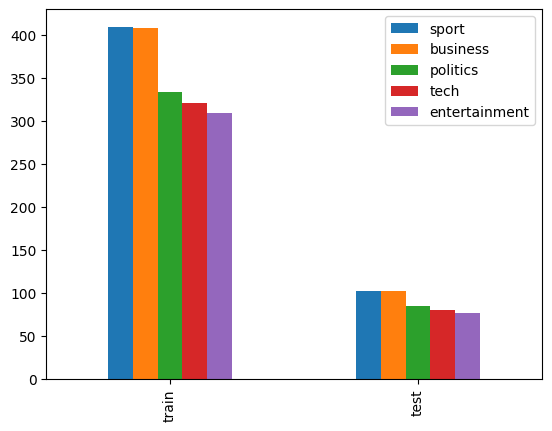

In [ ]:
pd.DataFrame([df_train.Category.value_counts(), df_test.Category.value_counts()], index=["train", "test"]).plot.bar()

## Data Pre-Processing

Since the data in raw form, we first have to preprocess it to make it more optimized

### 1. Removing Punctuations

removing punctuations such as commas and full-stops from the data.
We use the python regex. For more about it check [here](https://docs.python.org/3/library/re.html)

- Q1: clean the corpus

In [ ]:
def clean_text(text: str) -> str:
    """This function take as input a text and return a cleaned text."""
    text = text.lower().strip()
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub("\ +", " ", text)
    #text = text.strip()
    return text

df_train.Text = df_train.Text.map(clean_text)

In [ ]:
print(df_train.Text[i])

bookmakers back aviator for oscar

the aviator has been tipped by uk bookmakers as the favourite to win the best film award at this year s oscars 

ray star jamie foxx is clear favourite in the best actor category while million dollar baby s hilary swank is tipped to win the best actress prize bookmakers predict cate blanchett will be named best supporting actress william hill and ladbrokes have given the aviator and odds of winning best film with million dollar baby in second place at 

bet direct and bet also tip the aviator with the majority of bookmakers regarding finding neverland as the outsider the aviator is also widely tipped to win the best director prize for martin scorsese british star clive owen is second favourite at william hill to take the best supporting actor award for his performance in closer the favourite in that category is sideways star thomas hayden church vera drake star imelda staunton has odds of winning the best actress oscar at bet and william hill ahead of

- World cloud

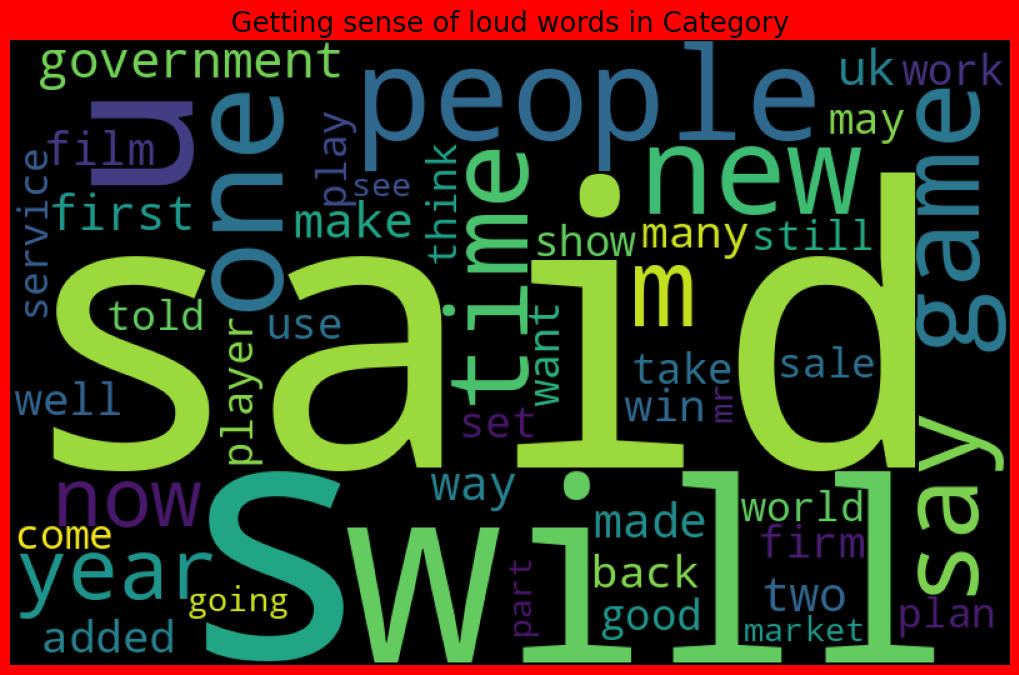

In [ ]:

word = df_train.Text

category_cloud = WordCloud(
    width = 800, height = 500, background_color = 'black', max_words = 50
    ).generate(' '.join(word))

plt.figure(figsize = (10,8),facecolor = 'r')
plt.imshow(category_cloud)
plt.title("Getting sense of loud words in Category",fontsize = 20);
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


### 2. Removing Stopwords

using NLTK :: Natural Language Toolkit to remove/filter out the stopwords (useless data)

In [ ]:
import nltk
nltk.download('stopwords')
STOPWORDS = nltk.corpus.stopwords.words("english")

def remove_stopwords(text):
    text_clean = ' '.join([word for word in text.split() if word not in STOPWORDS])
    return text_clean

df_train['Text'] = df_train['Text'].map(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(df_train.Text[i])

bookmakers back aviator oscar aviator tipped uk bookmakers favourite win best film award year oscars ray star jamie foxx clear favourite best actor category million dollar baby hilary swank tipped win best actress prize bookmakers predict cate blanchett named best supporting actress william hill ladbrokes given aviator odds winning best film million dollar baby second place bet direct bet also tip aviator majority bookmakers regarding finding neverland outsider aviator also widely tipped win best director prize martin scorsese british star clive owen second favourite william hill take best supporting actor award performance closer favourite category sideways star thomas hayden church vera drake star imelda staunton odds winning best actress oscar bet william hill ahead fellow uk star kate winslet odds william hill mike leigh outsider best director category vera drake position holds jointly ray taylor hackford bookmakers vc bet year academy awards handed hollywood february x factor judg

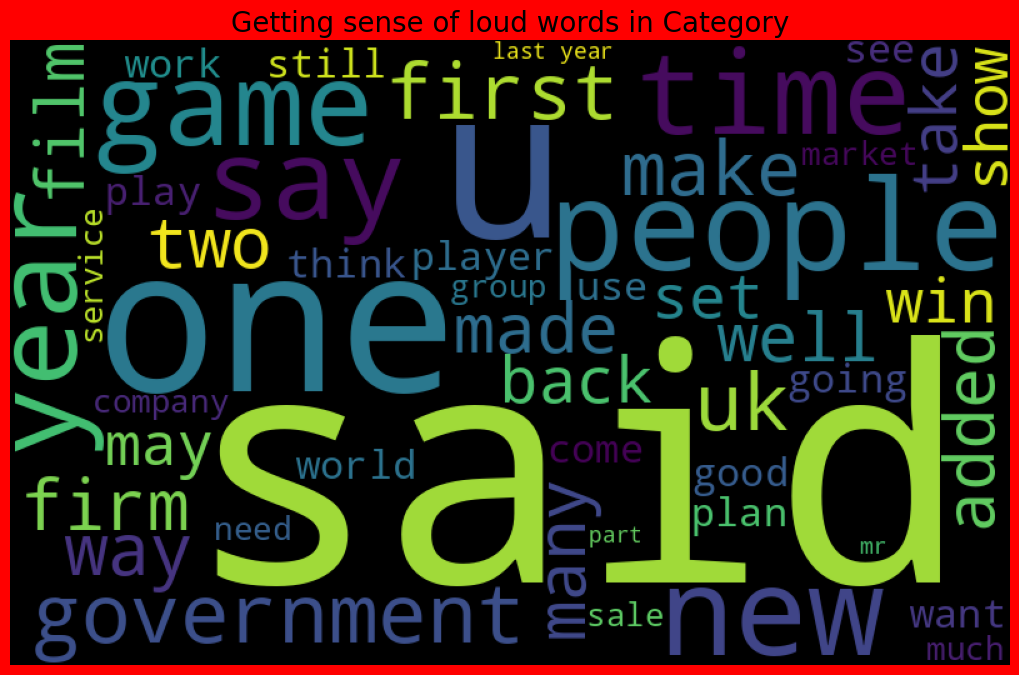

In [ ]:
#Getting sense of loud words

word = df_train['Text']

category_cloud = WordCloud(
    width = 800, height = 500, background_color = 'black', max_words = 50
    ).generate(' '.join(word))

plt.figure(figsize = (10, 8),facecolor = 'r')
plt.imshow(category_cloud)
plt.title("Getting sense of loud words in Category",fontsize = 20);
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### 3. Create tfidf matrix

[resource](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_train = None

tfidf_vectorizer = TfidfVectorizer()

tfidf_train = tfidf_vectorizer.fit_transform(df_train)

print(tfidf_train.shape)

(4, 4)


In [ ]:
# converting words to vector using TF-IDF Vectorizer
# code here
tfidf_train = None

tfidf_train.shape

(1780, 25429)

- What is the vocabulary resulting from this operation?

In [ ]:
vocab_sorted = []
 # code here

print(vocab_sorted)

['aaa', 'aaas', 'aac', 'aadc', 'aaliyah', 'aaltra', 'aamir', 'aan', 'aara', 'aarhus', 'aaron', 'abacus', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abatement', 'abating', 'abba', 'abbas', 'abbasi', 'abbey', 'abbot', 'abbott', 'abc', 'abd', 'abdication', 'abdominal', 'abducted', 'abduction', 'abdullah', 'abensur', 'aberavon', 'aberdeen', 'aberration', 'aberystwyth', 'abetting', 'abeyie', 'abhorrent', 'abi', 'abide', 'abided', 'abiding', 'abigail', 'abilities', 'ability', 'abish', 'able', 'abn', 'abnormal', 'abnormality', 'abolish', 'abolished', 'abolishing', 'aborted', 'abortion', 'abortionist', 'abortions', 'aboutroughly', 'abraham', 'abramovich', 'abroad', 'abrupt', 'absa', 'absence', 'absences', 'absent', 'absentee', 'absolute', 'absolutely', 'absolution', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'abstain', 'abstract', 'absurd', 'abtahi', 'abu', 'abundance', 'aburizal', 'abuse', 'abused', 'abusers', 'abuses', 'abusing', 'abusive', 'abut', 'abuzz', 'abysmal', 'academia

## Modeling

[source](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
model = LogisticRegression()

# define models and parameters
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(C=c_values, penalty=penalty)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=120)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=grid,
    cv=cv,
    scoring='accuracy',
    error_score=0,
    n_jobs=2
    )

In [ ]:
grid_result = grid_search.fit(tfidf_train, df_train.category_id)
# less than 4 min to run

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

training_stats = pd.DataFrame({
    "parameter": params,
    "cv_accuracy": means,
    "stds": stds
})
training_stats

Best: 0.976779 using {'C': 100, 'penalty': 'l2'}


,parameter,cv_accuracy,stds
0,"{'C': 100, 'penalty': 'l2'}",0.976779,0.005754
1,"{'C': 10, 'penalty': 'l2'}",0.976592,0.006039
2,"{'C': 1.0, 'penalty': 'l2'}",0.973221,0.009051
3,"{'C': 0.1, 'penalty': 'l2'}",0.916292,0.015963
4,"{'C': 0.01, 'penalty': 'l2'}",0.464045,0.006742
5,"{'C': 0, 'penalty': 'l2'}",0.000000,0.000000


In [ ]:
lr = grid_result.best_estimator_

## Evaluation

In [ ]:
df_test.Text = df_test.Text.map(clean_text)
df_test.Text = df_test.Text.map(lambda doc: remove_stopwords(doc))
tfidf_test = vectorizer.transform(df_test['Text'])

In [ ]:
lr.score(tfidf_test, df_test.category_id)

0.9707865168539326

In [ ]:
y_pred_lr = lr.predict(tfidf_test)

In [ ]:
category_map = {'politics': 1, 'entertainment': 0, 'tech': 4, 'sport': 2, 'business': 3}

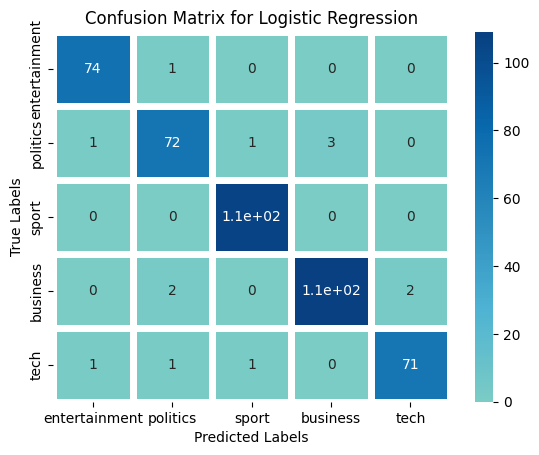

In [ ]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(df_test.category_id, y_pred_lr)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,center=0,cmap="GnBu")

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion Matrix for Logistic Regression')
ax.xaxis.set_ticklabels(category[1])
ax.yaxis.set_ticklabels(category[1])
plt.show()

## Production pipeline

[source](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
class Cleaning:
    def __init__(self, *functions):
        self.cleaning_functions = functions
        self.X = []
        self.y = []

    def fit(self, X, y=None):
        for x in X:
            for function in self.cleaning_functions:
                x = function(x)
            self.X.append(x)
            return X

    def transform(self, X):
        return self.fit(X)


In [ ]:
cleaning = Cleaning(clean_text, remove_stopwords)
classification_pipeline = make_pipeline(cleaning, vectorizer, lr)

In [ ]:
new_mail = """	Live Webinar: November 15
8 am PST / 5 pm CET

Gen AI data chain at scale
Generative AI workflows heavily rely on data-centric tasks—such as filtering samples by annotation fields, vector distances, or scores produced by custom classifiers. At the same time, computer vision datasets are quickly approaching petabyte volumes, rendering data wrangling difficult. In addition, the iterative nature of data preparation necessitates robust dataset sharing and versioning mechanisms, both of which are hard to implement ad-hoc. In this workshop we will introduce DVCx - an upcoming product by Iterative that separates the storage and processing of samples from metadata and enables data-centric operations at scale for machine learning teams and individual researchers.
​​
Speaker: Tibor Mach is a Machine Learning Solutions Engineer at Iterative.ai. He has been working in ML and MLOps in the past 5 years. Tibor has a Ph.D in mathematics from the University of Göttingen and had published papers in the field of probability theory prior to refocusing to ML.

REGISTER NOW
Don't Miss Our Upcoming Webinars!
Machine Learning Techniques in Healthcare Industry / November 16
Democratizing AI Deployment / November 28
Leveraging open-source LLMs for production / November 30
How to Instruction Tune a Base Language Model / December 7
GPT on a Leash: Evaluating LLM-based Apps & Mitigating Their Risks / December 12
See you there,
Data Phoenix Team

PS: If you can't make it, sign up anyway, and we’ll send you the recording."""
i = 29871
new_label = df_test.label[i]
new_mail = df_test.email[i]
print(new_label)
print(new_mail)

spam
med girl happy girl unsatisfied potency wait finds another men click choose great variety llcensed love best pri fast shippinq guaranteed effect buy riqht warehouse store verified bbb approved vlsa


In [ ]:
spam_detection_pipeline.predict([new_mail])
spam_detection_pipeline.predict_proba([new_mail])

array([[3.02544077e-05, 9.99969746e-01]])

##

In [ ]:
import pickle
with open(os.path.join(data_dir, 'spam_detection_pipeline3.pkl'), 'wb') as f:
    pickle.dump(spam_detection_pipeline, f)

- pandas plot: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html

- pickle: https://docs.python.org/3/library/pickle.html#:~:text=%E2%80%9CPickling%E2%80%9D%20is%20the%20process%20whereby,back%20into%20an%20object%20hierarchy.

- Supercharge Your Classes: https://realpython.com/python-super/

- custom pipeline: https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156

- Kfold: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html#sklearn.model_selection.RepeatedStratifiedKFold